In [180]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler


from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [181]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [182]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [183]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [184]:
df.shape

(768, 9)

In [185]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

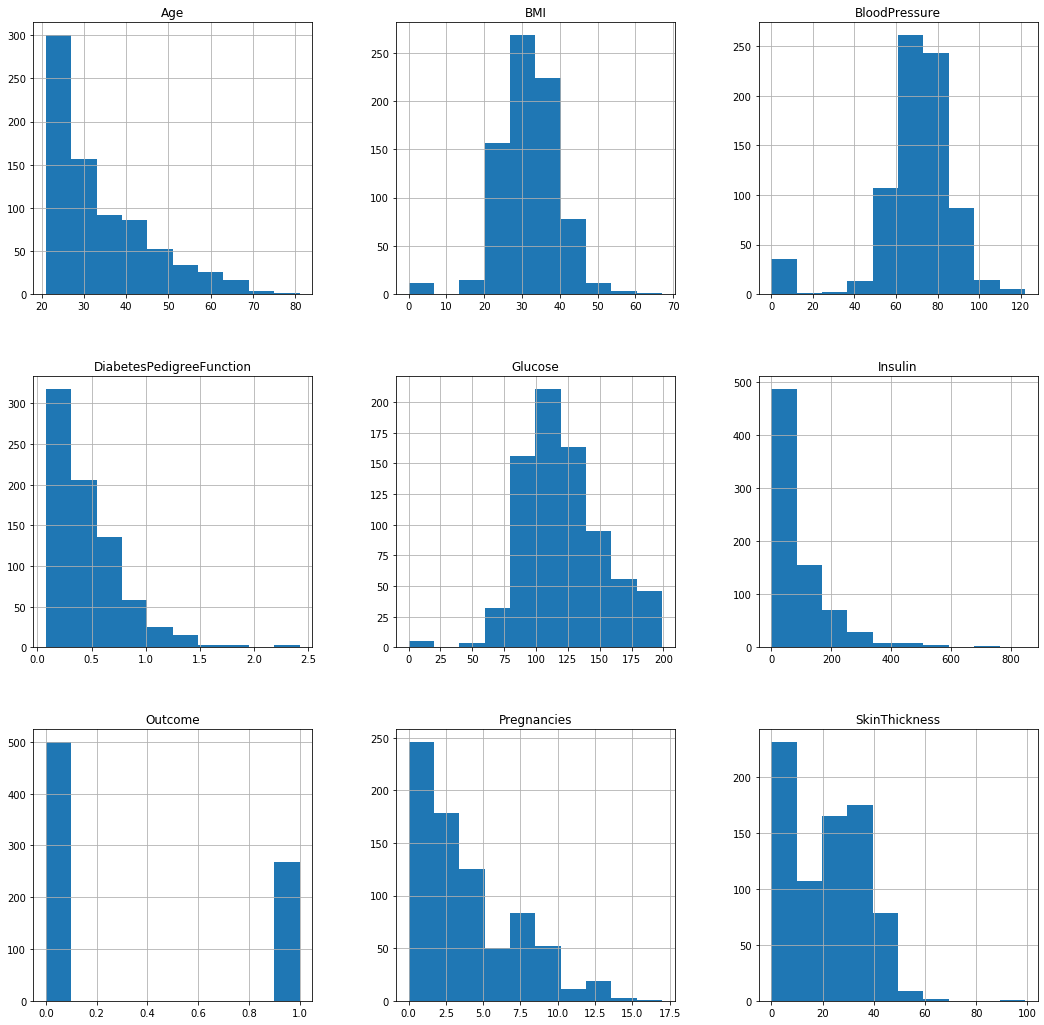

In [186]:
# data distribution of Numerical columns
import matplotlib.pyplot as plt
df.hist(figsize = (18,18))
plt.show()

# Creating function for visualization of confusion maytrix

In [187]:

##CONFUSION MATRIX FUNCTION
def confusionmatrix(y_test,y_predict,x='name of model'):
    cm=metrics.confusion_matrix(y_test,y_predict)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm,annot=True,cbar=False, fmt='g')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(x)
    return [ plt.show()]

# Applying models
* <b>Splitting data

In [188]:
X = df.drop('Outcome', axis=1)
X = StandardScaler().fit_transform(X)
y = df['Outcome']

In [189]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25,stratify = y, random_state=0)

In [190]:
# balance the dataset 
#from imblearn.combine import SMOTETomek
#smk = SMOTETomek()
#X_train, y_train = smk.fit_sample(X_train, y_train)

In [191]:
#print(X_train.shape)
#print(y_train.shape)

In [192]:
# scaling the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression
* <b>Performing grid search

In [193]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2'}
accuracy : 0.7621899576527527


<b>Fitting model

In [201]:
logreg = LogisticRegression(C = 0.1, penalty = 'l2')
logreg.fit(X_train,y_train)

LogisticRegression(C=0.1)

In [202]:
logreg_train_acc=logreg.score(X_train,y_train)
logreg_test_acc=logreg.score(X_test,y_test)

print('Train accuracy for LogisticRegression :', logreg.score(X_train,y_train))
print('Test accuracy for LogisticRegression :', logreg.score(X_test,y_test))

Train accuracy for LogisticRegression : 0.7760416666666666
Test accuracy for LogisticRegression : 0.7708333333333334


In [203]:
y_pred_logreg = logreg.predict(X_test)

In [204]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred_logreg))

              precision    recall  f1-score   support

           0       0.79      0.89      0.83       125
           1       0.73      0.55      0.63        67

    accuracy                           0.77       192
   macro avg       0.76      0.72      0.73       192
weighted avg       0.77      0.77      0.76       192



### Storing information for ROC CURVE

In [205]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
roc_auc_logistic_reg=roc_auc_score(y_test,logreg.predict(X_test))
fpr1,tpr1,thresholds=roc_curve(y_test,logreg.predict(X_test))


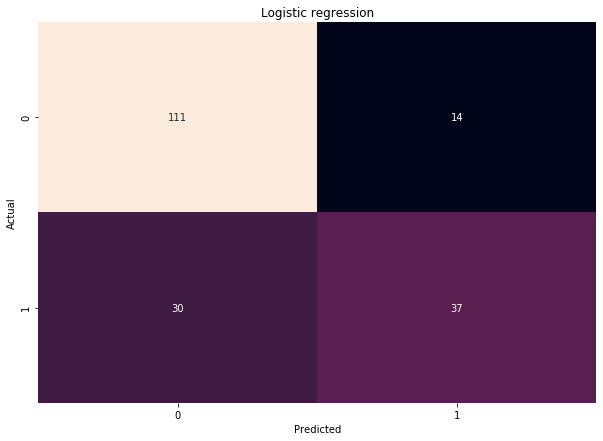

[None]

In [206]:
# visualization using confusion matrix
confusionmatrix(y_test,logreg.predict(X_test),x='Logistic regression')

# SVM (SUPPORT VECTOR MACHINE )
<b>Performing grid search

In [207]:
from sklearn.svm import SVC
# defining parameter range 
param_grid = [{'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']},{'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}]
svc = SVC()
svc_cv = GridSearchCV(svc, param_grid, scoring='accuracy', cv=10,n_jobs=-1) 
svc_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",svc_cv.best_params_)
print("accuracy :",svc_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
accuracy : 0.7726255293405928


In [208]:
svc = SVC(C= 1, gamma= 0.01, kernel= 'rbf')
svc.fit(X_train, y_train)

SVC(C=1, gamma=0.01)

In [209]:
svm_train_acc=svc.score(X_train,y_train)
svm_test_acc=svc.score(X_test,y_test)

print('Train accuracy for SVM:', svc.score(X_train,y_train))
print('Test accuracy for SVM :', svc.score(X_test,y_test))

Train accuracy for SVM: 0.7777777777777778
Test accuracy for SVM : 0.7708333333333334


In [210]:
y_pred_svm = svc.predict(X_test)

In [211]:
print(metrics.classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       125
           1       0.73      0.54      0.62        67

    accuracy                           0.77       192
   macro avg       0.76      0.72      0.73       192
weighted avg       0.77      0.77      0.76       192



### Storing information for ROC CURVE

In [212]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
roc_auc_svm_reg=roc_auc_score(y_test,svc.predict(X_test))
fpr2,tpr2,thresholds=roc_curve(y_test,svc.predict(X_test))

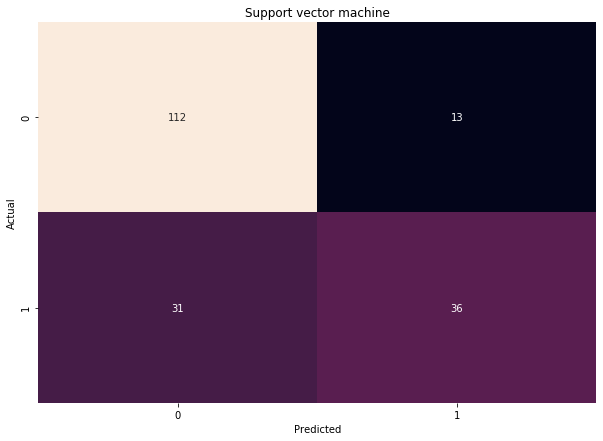

[None]

In [213]:
# visualization using confusion matrix
confusionmatrix(y_test,svc.predict(X_test),x='Support vector machine')

# Random Forest
<b>Performing RandomizedSearchCV


In [214]:
from sklearn.model_selection import RandomizedSearchCV
def hypertuning_rscv(est,p_distr,nbr_iter,X,y):
    rdmsearch=RandomizedSearchCV(est,param_distributions=p_distr,n_jobs=-1,n_iter=nbr_iter,cv=9)
    rdmsearch.fit(X,y)
    ht_params=rdmsearch.best_params_
    ht_score=rdmsearch.best_score_
    return ht_params, ht_score 

In [215]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
est =RandomForestClassifier(n_jobs=-1)
rf_p_dist={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200,300,400,500,600,700,800,900,1000],
               'criterion':['gini','entropy'],
               'bootstrap':[True,False],
              }
rf_parameters,rf_ht_score=hypertuning_rscv(est,rf_p_dist,40,X_train,y_train)

print(rf_parameters)
print(rf_ht_score)


{'n_estimators': 400, 'max_depth': 5, 'criterion': 'entropy', 'bootstrap': False}
0.7673611111111112


In [216]:
clf=RandomForestClassifier(n_estimators= 400, max_depth= 5, criterion= 'entropy', bootstrap= False)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=5,
                       n_estimators=400)

In [217]:
random_train_acc=clf.score(X_train,y_train)
random_test_acc=clf.score(X_test,y_test)
print('Train accuracy for Random Forest:', clf.score(X_train,y_train))
print('Test accuracy for Random Forest :', clf.score(X_test,y_test))

Train accuracy for Random Forest: 0.8524305555555556
Test accuracy for Random Forest : 0.78125


In [218]:
y_pred_rnd = clf.predict(X_test)

In [219]:
print(metrics.classification_report(y_test,y_pred_rnd))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       125
           1       0.73      0.60      0.66        67

    accuracy                           0.78       192
   macro avg       0.77      0.74      0.75       192
weighted avg       0.78      0.78      0.78       192



### Storing information for ROC CURVE

In [220]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
roc_auc_rnd_reg=roc_auc_score(y_test,clf.predict(X_test))
fpr3,tpr3,thresholds=roc_curve(y_test,clf.predict(X_test))

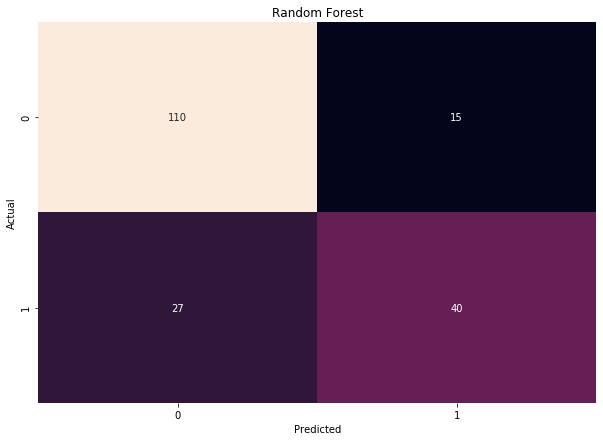

[None]

In [221]:
# visualization using confusion matrix
confusionmatrix(y_test,clf.predict(X_test),x='Random Forest')

# K-NN Method

In [222]:
from sklearn.neighbors import KNeighborsClassifier
acc_train_knn_classifier= np.empty((10, 1))
acc_test_knn_classifier= np.empty((10, 1))

for i in range(0,10):
      knn = KNeighborsClassifier(n_neighbors=i+1)
      knn.fit(X_train,y_train)
      acc_train_knn_classifier[i,:]=round(knn.score(X_train,y_train) * 100, 2)
      acc_test_knn_classifier[i,:]= round(knn.score(X_test,y_test) * 100, 2)
    
acc_test_knn_classifier

array([[72.92],
       [70.31],
       [75.52],
       [75.52],
       [75.  ],
       [73.44],
       [76.04],
       [72.92],
       [73.44],
       [71.88]])

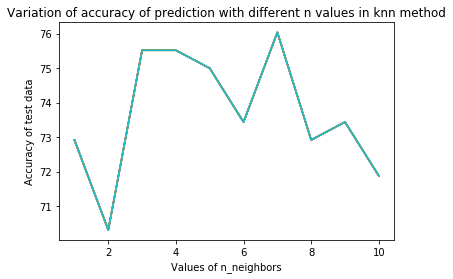

In [223]:
plt.figure()        
l = range(1,11)
for j in range(len(l)):     
    plt.plot( l, acc_test_knn_classifier)
    plt.xlabel('Values of n_neighbors')
    plt.ylabel('Accuracy of test data')
    plt.title('Variation of accuracy of prediction with different n values in knn method')

In [224]:
maxElement = np.amax(acc_test_knn_classifier)    
result = np.where(acc_test_knn_classifier == np.amax(acc_test_knn_classifier))
max_accuracy_index=result[0]+1

max_accuracy_index

array([7], dtype=int64)

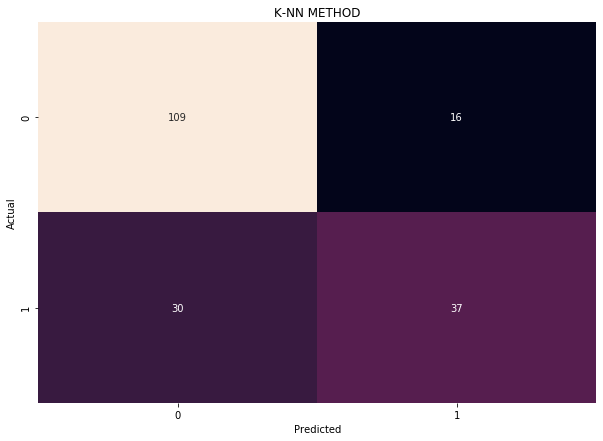

[None]

In [225]:
#visualization using confusion matrix for maximum accuracy as it comes at n_neighbors
knn =KNeighborsClassifier(n_neighbors=max_accuracy_index[0])
knn.fit(X_train,y_train)
# visualization using confusion matrix
confusionmatrix(y_test,knn.predict(X_test),x='K-NN METHOD')

In [226]:
y_pred_knn = knn.predict(X_test)

In [227]:
print(metrics.classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.78      0.87      0.83       125
           1       0.70      0.55      0.62        67

    accuracy                           0.76       192
   macro avg       0.74      0.71      0.72       192
weighted avg       0.75      0.76      0.75       192



### Storing information for ROC CURVE

In [228]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
roc_auc_KNN_reg=roc_auc_score(y_test,knn.predict(X_test))
fpr4,tpr4,thresholds=roc_curve(y_test,knn.predict(X_test))

# Plotting roc curves

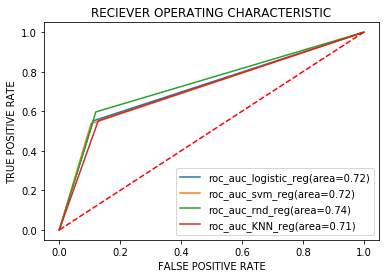

In [229]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr1,tpr1,Label="roc_auc_logistic_reg(area=%0.2f)" % roc_auc_logistic_reg )
plt.plot(fpr2,tpr2,Label="roc_auc_svm_reg(area=%0.2f)" % roc_auc_svm_reg )
plt.plot(fpr3,tpr3,Label="roc_auc_rnd_reg(area=%0.2f)" % roc_auc_rnd_reg )
plt.plot(fpr4,tpr4,Label="roc_auc_KNN_reg(area=%0.2f)" % roc_auc_KNN_reg )
plt.plot([0,1],[0,1],'r--')
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.title('RECIEVER OPERATING CHARACTERISTIC')
plt.legend(loc="lower right")
plt.show()

# Machine learning Models evaluation


In [232]:
##Models evaluation
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'Random Forest','KNN CLASSIFIER'],
    'Score_train': [logreg_train_acc, svm_train_acc,random_train_acc, acc_train_knn_classifier[6]],
    'Score_test': [logreg_test_acc, svm_test_acc,random_test_acc, acc_test_knn_classifier[6]]})

models['Score_diff'] = abs(models['Score_train'] - models['Score_test'])
models.sort_values(by=['Score_diff'], ascending=True)
models

,Model,Score_train,Score_test,Score_diff
0,Logistic Regression,0.776042,0.770833,0.00520833
1,Support Vector Machines,0.777778,0.770833,0.00694444
2,Random Forest,0.852431,0.78125,0.0711806
3,KNN CLASSIFIER,[78.65],[76.04],[2.6099999999999994]


# Models evaluation plot

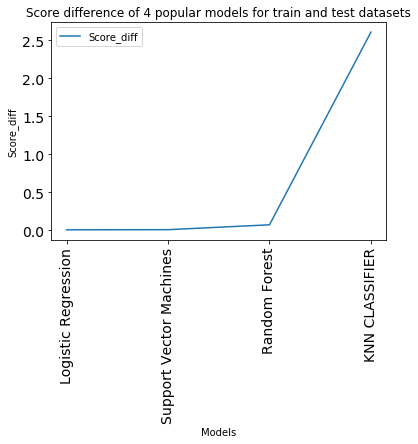

In [233]:
plt.figure()
xx = models['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, models['Score_diff'], label = 'Score_diff')
plt.legend()
plt.title('Score difference of 4 popular models for train and test datasets')
plt.xlabel('Models')
plt.ylabel('Score_diff')
plt.xticks(xx, rotation='vertical')
plt.show()

# Applying Neural networks

## Import necessary sklearn and keras packages

In [264]:
import keras
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()

classifier.add(Dense(units= 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 8))
classifier.add(Dense(units= 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units= 4, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])




In [265]:
classifier.summary()

Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_166 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_167 (Dense)            (None, 6)                 54        
_________________________________________________________________
dense_168 (Dense)            (None, 4)                 28        
_________________________________________________________________
dense_169 (Dense)            (None, 1)                 5         
Total params: 159
Trainable params: 159
Non-trainable params: 0
_________________________________________________________________


In [266]:
history = classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
576/576 [==============================] - 0s 437us/step - loss: 0.6902 - accuracy: 0.6424
Epoch 2/100
576/576 [==============================] - 0s 94us/step - loss: 0.6823 - accuracy: 0.6510
Epoch 3/100
576/576 [==============================] - 0s 98us/step - loss: 0.6575 - accuracy: 0.6510
Epoch 4/100
576/576 [==============================] - 0s 79us/step - loss: 0.5877 - accuracy: 0.6510
Epoch 5/100
576/576 [==============================] - 0s 85us/step - loss: 0.5389 - accuracy: 0.6510
Epoch 6/100
576/576 [==============================] - 0s 83us/step - loss: 0.5265 - accuracy: 0.6510
Epoch 7/100
576/576 [==============================] - 0s 84us/step - loss: 0.5222 - accuracy: 0.6510
Epoch 8/100
576/576 [==============================] - 0s 87us/step - loss: 0.5192 - accuracy: 0.6510
Epoch 9/100
576/576 [==============================] - 0s 88us/step - loss: 0.5166 - accuracy: 0.6510
Epoch 10/100
576/576 [==============================] - 0s 85us/step - loss: 0.51

576/576 [==============================] - 0s 76us/step - loss: 0.4613 - accuracy: 0.7743
Epoch 81/100
576/576 [==============================] - 0s 77us/step - loss: 0.4622 - accuracy: 0.7778
Epoch 82/100
576/576 [==============================] - 0s 76us/step - loss: 0.4615 - accuracy: 0.7812
Epoch 83/100
576/576 [==============================] - 0s 75us/step - loss: 0.4605 - accuracy: 0.7812
Epoch 84/100
576/576 [==============================] - 0s 75us/step - loss: 0.4597 - accuracy: 0.7830
Epoch 85/100
576/576 [==============================] - 0s 70us/step - loss: 0.4603 - accuracy: 0.7760
Epoch 86/100
576/576 [==============================] - 0s 78us/step - loss: 0.4598 - accuracy: 0.7830
Epoch 87/100
576/576 [==============================] - 0s 73us/step - loss: 0.4593 - accuracy: 0.7830
Epoch 88/100
576/576 [==============================] - 0s 73us/step - loss: 0.4593 - accuracy: 0.7847
Epoch 89/100
576/576 [==============================] - 0s 76us/step - loss: 0.4591 - 

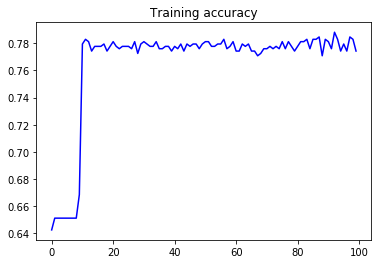

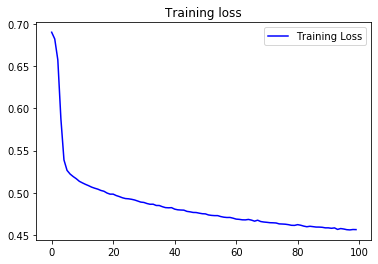

In [267]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()